<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#explore-data" data-toc-modified-id="explore-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>explore data</a></span></li><li><span><a href="#processed-data" data-toc-modified-id="processed-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>processed data</a></span></li><li><span><a href="#build-model-1:-decision-tree" data-toc-modified-id="build-model-1:-decision-tree-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>build model 1: decision tree</a></span></li><li><span><a href="#build-random-forest" data-toc-modified-id="build-random-forest-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>build random forest</a></span></li><li><span><a href="#hyper-parameter-tuning" data-toc-modified-id="hyper-parameter-tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>hyper parameter tuning</a></span></li><li><span><a href="#learning-curve" data-toc-modified-id="learning-curve-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>learning curve</a></span></li><li><span><a href="#check-on-test-set" data-toc-modified-id="check-on-test-set-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>check on test set</a></span><ul class="toc-item"><li><span><a href="#summary:" data-toc-modified-id="summary:-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>summary:</a></span></li></ul></li><li><span><a href="#visualize-decision-surface" data-toc-modified-id="visualize-decision-surface-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>visualize decision surface</a></span></li><li><span><a href="#to-do" data-toc-modified-id="to-do-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>to do</a></span></li></ul></div>

# wine quality prediction based on chemical properties

- predict the quality of a wine based on the chemical properties of the wine.
- dataset: wine quality dataset hosted on the <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">UCI website</a>. 
- barplot analyze quality dependence on chemicals.

In [97]:
# essential
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report




##  Data preparation

Import data

In [3]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


total 1599. no NaN object.

- features: all columns except quality.
- target: quality
- classified quality into bad $(score<7)$ or good $(score>7)$ into 0 or 1.

## explore data

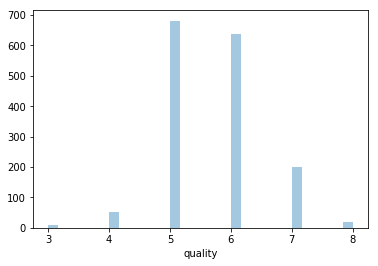

In [5]:
# how does the quality distributed?
sns.distplot(df.quality,kde=False)

almost gaussian-like. with most quality at 5.

In [6]:
list_features = df.columns.tolist()
list_features[:-1]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

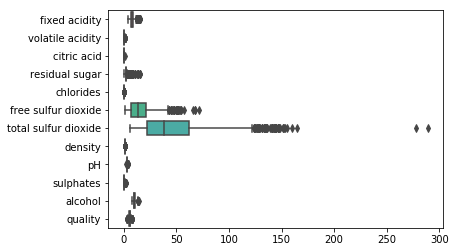

In [7]:
# univariate 
sns.boxplot(data=df,orient='h')

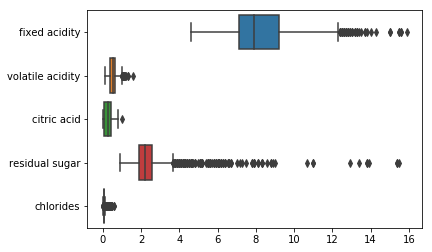

In [8]:
sns.boxplot(data=df.iloc[:,0:5],orient='h')

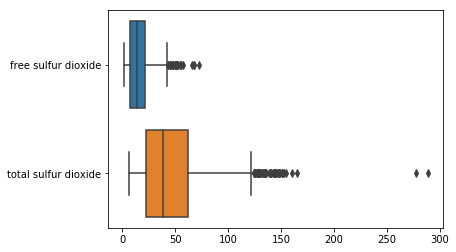

In [9]:
sns.boxplot(data=df.iloc[:,5:7],orient='h')

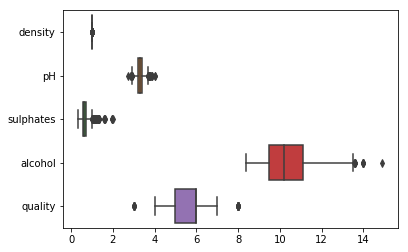

In [10]:
sns.boxplot(data=df.iloc[:,7:],orient='h')

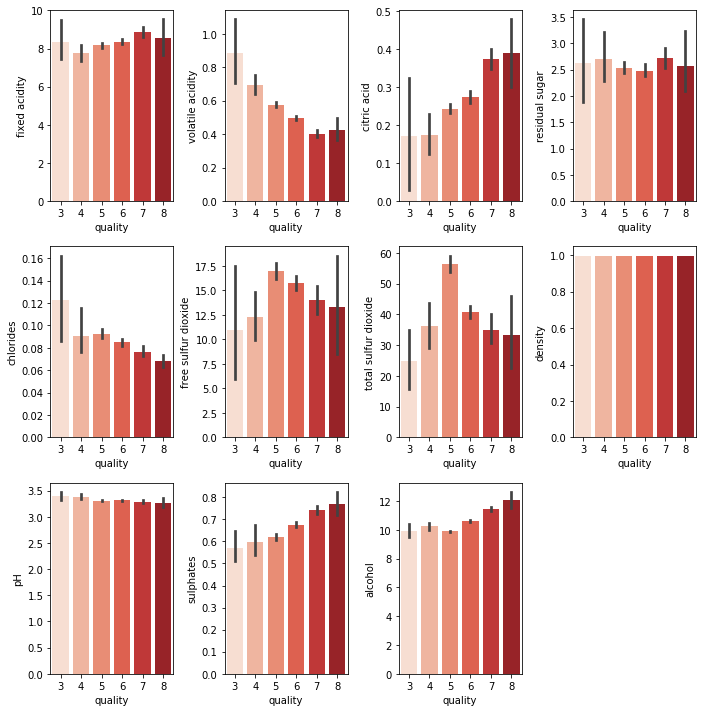

In [11]:
# how the quality related to features?
j=0
plt.figure(figsize=(10,10))
for i in list_features[:-1]:
    j+=1
    plt.subplot(3, 4,j )

    sns.barplot(x='quality',y=i,palette='Reds',data=df)

plt.tight_layout()
plt.savefig('./figures/features.png')

we can see that there are correlations of quality with these features: 'volatile acidity',
 'citric acid',
 'chlorides',
 'pH',
 'sulphates',
 'alcohol'

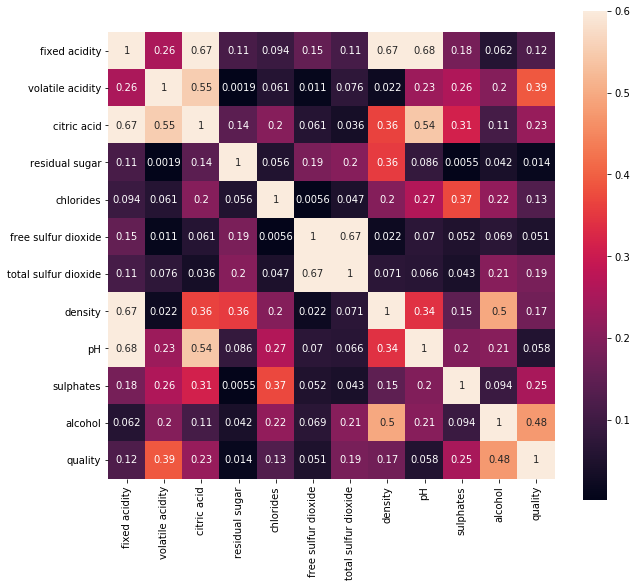

In [12]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(abs(corrmat), vmax=0.6, square=True,annot=True)
plt.savefig('./figures/corrmat.png')

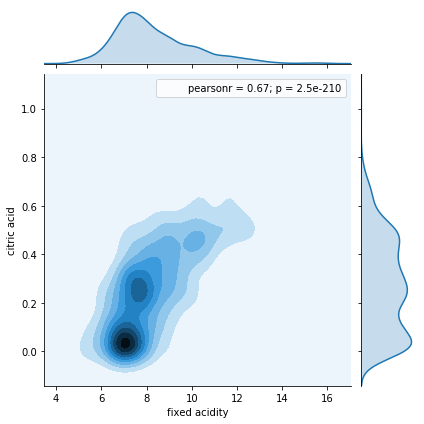

In [13]:
sns.jointplot(x='fixed acidity', y="citric acid", data=df, kind="kde");

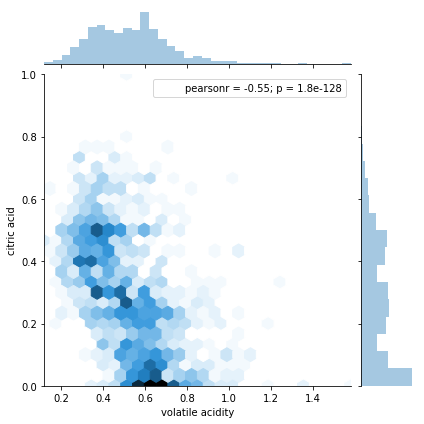

In [14]:
sns.jointplot(x='volatile acidity', y="citric acid", data=df, kind="hex");

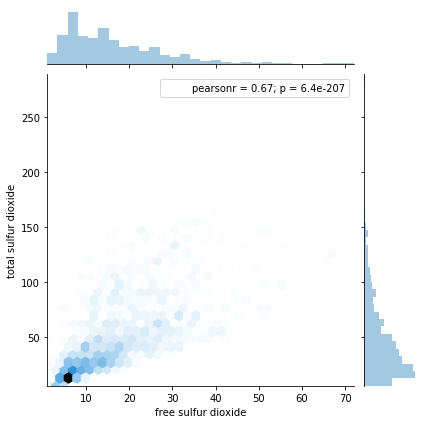

In [15]:
sns.jointplot(x='free sulfur dioxide', y="total sulfur dioxide", data=df, kind="hex");

## processed data
- I binarized the quality into two group, quality $\le$6 as bad and quality $\ge$ 7 as good.
- set aside test set.
- there are less good wine than bad wine. so resample the data to make it balanced.
- apply standard scaler
- split into train and dev set

In [16]:
# binarized
df.quality = df.quality.apply(lambda x:1 if x>=7 else 0)


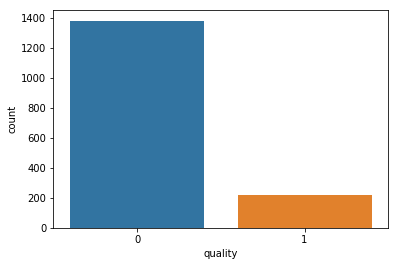

In [17]:
sns.countplot(df.quality)

In [18]:
# apply standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:,:-1] = sc.fit_transform(df.iloc[:,:-1])


In [19]:
# check
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


In [20]:
# set aside test set
df_test = df.sample(frac = 0.2,random_state=1)
df_train_dev = df.drop(df_test.index)
df_test.shape,df_train_dev.shape


((320, 12), (1279, 12))

In [56]:
# make the train_dev data set balance.
from sklearn.utils import resample


df_majority = df_train_dev[df_train_dev.quality==0]
df_minority = df_train_dev[df_train_dev.quality==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results


In [57]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,0


In [61]:
df_upsampled = df_upsampled.sample(frac=1,random_state=1)

df_upsampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
375,1.827215,0.068040,2.254411,1.320476,0.776472,-0.944346,-0.956903,0.876283,-1.950996,1.014147,1.292568,1
262,-0.183641,-0.043689,-1.237421,-0.595114,-0.371229,-0.561823,-0.348724,-0.528254,0.187166,-0.520193,-0.397043,0
509,2.861370,-1.328579,2.459812,0.185312,-0.073677,0.681377,-0.105452,0.982285,-1.756618,0.128950,0.917099,1
1129,1.252685,-0.546472,0.405794,0.540051,0.096353,0.777007,0.715590,0.653677,-0.655141,0.187963,0.072294,0
1574,-1.562514,-1.216849,2.613864,8.060517,-0.286214,0.681377,1.384587,0.012360,0.511130,-1.051311,0.072294,0


In [62]:
# check the number

df_upsampled.quality.value_counts()

1    1094
0    1094
Name: quality, dtype: int64

In [142]:
#from sklearn.model_selection import train_test_split

#X_train,X_dev,y_train,y_dev=train_test_split(df_upsampled.iloc[:,:-1],df_upsampled.iloc[:,-1],test_size=0.2, random_state = 42)

In [63]:
X_train = df_upsampled.iloc[:,:-1]
y_train = df_upsampled.iloc[:,-1]

## build model 1: decision tree

In [123]:
# identifying the most important factors.
tree_clf=DecisionTreeClassifier()
cross_val_score(tree_clf,X_train,y_train)

array([0.94931507, 0.94794521, 0.94642857])

In [124]:
tree_clf.fit(X_train,y_train)
pred_tree_clf = tree_clf.predict(X_test)
print(classification_report(y_test, pred_tree_clf))

             precision    recall  f1-score   support

          0       0.95      0.92      0.93       288
          1       0.41      0.53      0.47        32

avg / total       0.89      0.88      0.88       320



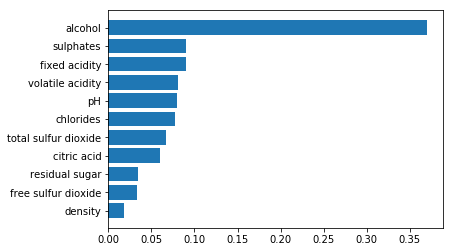

In [125]:
list_importance = tree_clf.feature_importances_
list_name = X_train.columns
list_importance, list_name = zip(*sorted(zip(list_importance, list_name)))
plt.barh(range(len(list_importance)),list_importance)
plt.yticks(range(len(list_name)),list_name)
plt.show()

## build random forest


In [65]:
random_clf = RandomForestClassifier(n_estimators=200)
cross_val_score(random_clf,X_train,y_train)

array([0.9630137 , 0.94794521, 0.96978022])

In [66]:
cross_val_score(random_clf,X_train,y_train,scoring='f1')

array([0.96306069, 0.95187166, 0.97326203])

Text(0.5,1,'auc score is 1.000000')

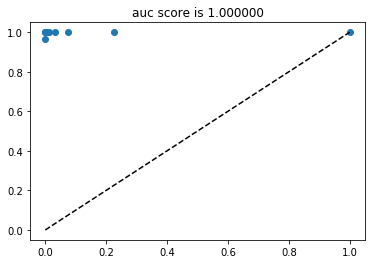

In [94]:
random_clf.fit(X_train,y_train)
prob_random_clf = random_clf.predict_proba(X_train)

fpr_grd, tpr_grd, _ = roc_curve(y_train, prob_random_clf[:,1])
plt.plot(fpr_grd,tpr_grd,'o')
plt.plot([0, 1], [0, 1], 'k--')

auc_score = roc_auc_score(y_train, prob_random_clf[:,1])
plt.title('auc score is %f'% auc_score)

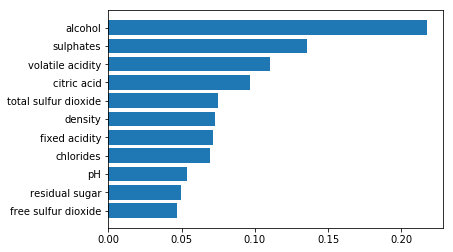

In [68]:
# identifying the most important factors.
list_importance = random_clf.feature_importances_
list_name = X_train.columns
list_importance, list_name = zip(*sorted(zip(list_importance, list_name)))
plt.barh(range(len(list_importance)),list_importance)
plt.yticks(range(len(list_name)),list_name)
plt.show()

## hyper parameter tuning

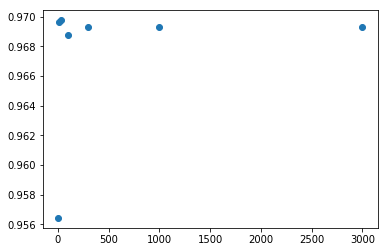

In [71]:
arr = [3,10,30,100,300,1000,3000]
f1s = []
for i in arr:
    random_clf = RandomForestClassifier(n_estimators=i,random_state=1)
    f1score = cross_val_score(random_clf,X_train,y_train,cv = 3,scoring='f1')
    f1s.append(f1score.mean())
plt.plot(arr,f1s,'o')

In [182]:
random_clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

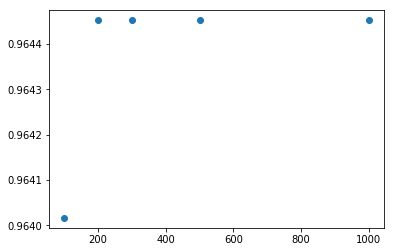

In [73]:
arr = [100,200,300,500,1000]
f1s = []

for i in arr:
    random_clf = RandomForestClassifier(random_state = 1,n_estimators=30 , max_leaf_nodes=i)
    random_clf.fit(X_train, y_train)
    f1score = cross_val_score(random_clf,X_train,y_train,cv = 3,scoring='f1')
    f1s.append(f1score.mean())

plt.plot(arr,f1s,'o')  


In [43]:
random_clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

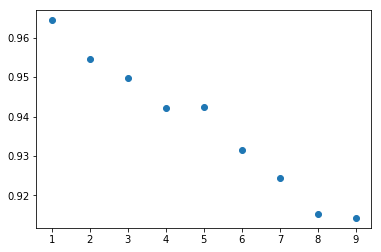

In [74]:
arr = range(1,10,1)
f1s = []
for i in arr:
    random_clf = RandomForestClassifier(random_state = 1,n_estimators=30 , max_leaf_nodes=200,min_samples_leaf=i)
    random_clf.fit(X_train, y_train)
    f1score = cross_val_score(random_clf,X_train,y_train,cv = 3,scoring='f1')
    f1s.append(f1score.mean())

plt.plot(arr,f1s,'o')  



Text(0.5,1,'max_depth')

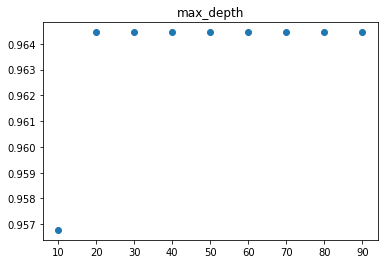

In [75]:
arr = range(10,100,10)
f1s = []
for i in arr:
    random_clf = RandomForestClassifier(random_state = 1,n_estimators=30 , max_leaf_nodes=200,max_depth=i)
    random_clf.fit(X_train, y_train)
    f1score = cross_val_score(random_clf,X_train,y_train,cv = 3,scoring='f1')
    f1s.append(f1score.mean())
    
plt.plot(arr,f1s,'o')  
plt.title('max_depth')

## learning curve

In [39]:
def plot_learning_curve(estimator, X, y,cv = 5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title('learning curves')
    #if ylim is not None:
    #    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

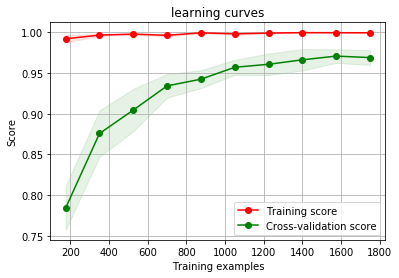

In [77]:
random_clf = RandomForestClassifier(random_state = 1)

plot_learning_curve(random_clf, X_train,y_train)
plt.savefig('./figures/learning_curve.png')

## check on test set

In [79]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]
random_clf.fit(X_train,y_train)
pred_test = random_clf.predict(X_test)
confusion_matrix(pred_test,y_test)

array([[276,  17],
       [ 12,  15]])

Text(0.5,1,'auc=0.875543')

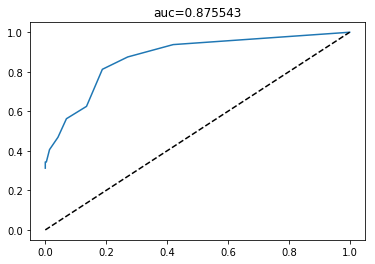

In [91]:
pred_proba_test = random_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,pred_proba_test[:,1] )
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
auc_score = roc_auc_score(y_test,pred_proba_test[:,1])
plt.title('auc=%f'% auc_score)

### summary:
- low bias, higher variance: 
- need to regularized the model: hyper-parameter tuning. min_samples_split, min_samples_leaf,max_leaf_nodes, max_features 
- getting more training data

## visualize decision surface

In [126]:
def plot_decision_surface(clf, X_train, Y_train):
    Xmin0 = X_train[:, 0].min()
    Xmin1 = X_train[:, 1].min()
    Xmax0 = X_train[:, 0].max()
    Xmax1 = X_train[:, 1].max() 
    
    plot_step_0=(Xmax0-Xmin0)/50
    plot_step_1=(Xmax1-Xmin1)/50
    
    x_min, x_max = Xmin0, Xmax0
    y_min, y_max = Xmin1, Xmax1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step_0),
                         np.arange(y_min, y_max, plot_step_1))

    clf.fit(X_train,Y_train)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
   
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis,alpha=0.5)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired,alpha=0.5)
    plt.show()

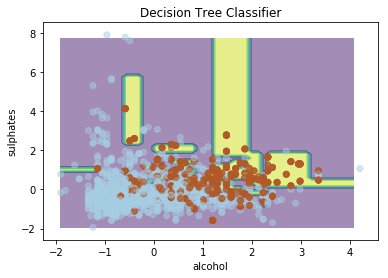

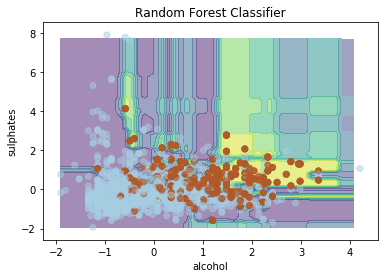

In [127]:
# 
from sklearn.tree import DecisionTreeClassifier
imp_cols = tree_clf.feature_importances_.argsort()[::-1][0:2]
X_imp = X_train.iloc[:,imp_cols].values

classifiers = [tree_clf,
               random_clf]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier']
label_feature = X_train.columns[imp_cols].tolist()


for c in range(2):
    plt.title(titleClassifer[c])
    plt.xlabel(label_feature[0])
    plt.ylabel(label_feature[1])
    plot_decision_surface(classifiers[c], X_imp, y_train.values)

## to do

- feature engineering: for example, ratio between alcohol and sulphate. This will require a good understanding of how chemical ratio affect taste in a wine. 
